## For exercising GridSearhCV()
- from Kaggle

In [2]:
import numpy as np       # linear algebra
import pandas as pd      # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [10]:
# The subprocess module allows you to spawn new processes, connect to their 
# input/output/error pipes, and obtain their return codes
from subprocess import check_output
import subprocess
# subprocess.run(["ls", ""])
# subprocess.run(["ls", "../input"], check=True, stdout=PIPE).stdout
# print(check_output(["ls", "../input"]).decode("utf8"))

%matplotlib inline

In [12]:
train=pd.read_csv("../Lab_M2/data/titanic/train.csv")
test=pd.read_csv("../Lab_M2/data/titanic/test.csv")

print("Train dataset has {} samples and {} attributes".format(*train.shape))
print("Test dataset has {} samples and {} attributes".format(*test.shape))

Train dataset has 891 samples and 12 attributes
Test dataset has 418 samples and 11 attributes


In [24]:
train.head().T
# train.shape
# train.columns, train.index

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


- We have 11 feature columns and target variable 'Survived' which is binary.
- Pclass, Sex and Embarked are Categorical Features while Age, SibSp, Parch 
  and Fare are continuous variables.
- We will use Name, Ticket and Cabin variable in Feature Engineering.

In [30]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

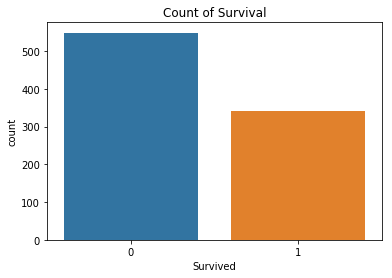

In [31]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='Survived', data=train)
plt.title("Count of Survival")
plt.show()

In [32]:
n=len(train)
surv_0=len(train[train['Survived']==0])
surv_1=len(train[train['Survived']==1])

print("% of passanger survived in train dataset: ",surv_1*100/n)
print("% of passanger not survived in train dataset: ",surv_0*100/n)

% of passanger survived in train dataset:  38.38383838383838
% of passanger not survived in train dataset:  61.61616161616162


- Let's find correlation between Numeric Variable

In [34]:
cat=['Pclass','Sex','Embarked']
num=['Age','SibSp','Parch','Fare']
corr_df=train[num]
cor= corr_df.corr(method='pearson')
print(cor)

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


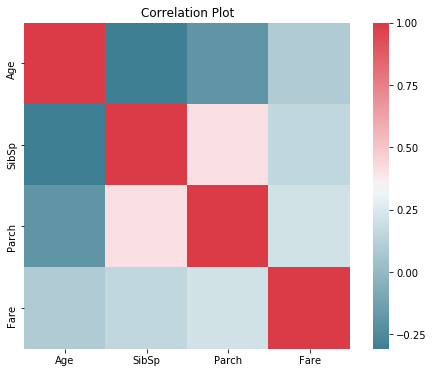

In [35]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

- There's no strong correlation between any two variables. The strongest 
  correlation is between SibSp and Parch features (0.414).
- I would like to keep all the features as there is no strong evidence of 
  data redundancy.
- Let's use chi-square test to understand relationship between categorical 
  variables and target variable.

In [36]:
csq=chi2_contingency(pd.crosstab(train['Survived'], train['Sex']))
print("P-value: ",csq[1])

P-value:  1.1973570627755645e-58


In [37]:
csq

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

In [38]:
csq2=chi2_contingency(pd.crosstab(train['Survived'], train['Embarked']))
print("P-value: ",csq2[1])

P-value:  1.769922284120912e-06


In [39]:
csq3=chi2_contingency(pd.crosstab(train['Survived'], train['Pclass']))
print("P-value: ",csq3[1])

P-value:  4.549251711298793e-23


- P values for features Sex, Embarked and Pclass are very low. So we can 
  reject our Null Hypothesis which is these features are independent and 
  have no relationship with target variable.
- So these features contribute by providing some information.

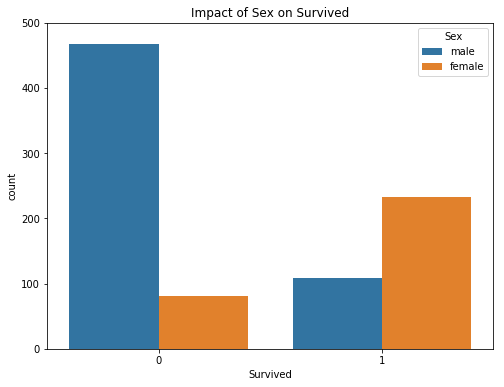

In [40]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=train, hue='Sex')
ax.set_ylim(0,500)
plt.title("Impact of Sex on Survived")
plt.show()

- We can say that Female passangers have higher probability of survival than Male passangers



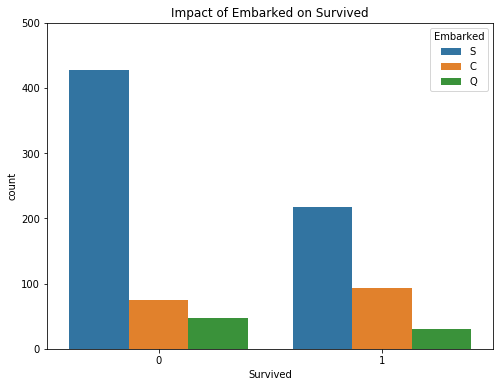

In [41]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=train, hue='Embarked')
ax.set_ylim(0,500)
plt.title("Impact of Embarked on Survived")
plt.show()

- Ratio of Survived and Not Survived passangers for S and Q Embarked are 
  similar but Passengers from C embarked have higer chances of survival.

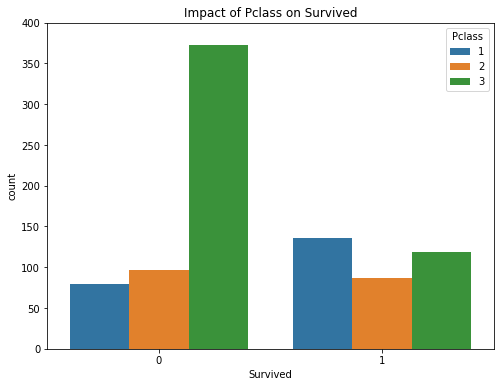

In [42]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=train, hue='Pclass')
ax.set_ylim(0,400)
plt.title("Impact of Pclass on Survived")
plt.show()

- Passengers from Pclass 3 have lesser chances of Survival while passengers 
  from Pclass 1 have higher chances of survival.

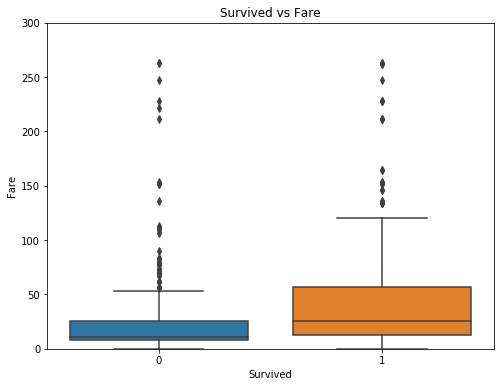

In [43]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='Survived',y='Fare', data=train)
ax.set_ylim(0,300)
plt.title("Survived vs Fare")
plt.show()

- Average Fare for passangers who survived is higher than not survived.

## Handling Missing Values
- Let's check which features contain missing values

In [46]:
print(train.isnull().sum())
print('-----------')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


- Only 4 features have missing values - Age, Cabin, Fare, Embarked

In [47]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [48]:
train.shape

(891, 12)

In [49]:
# Let's replace missing values by median of Age.
med=np.nanmedian(train['Age'])
train['Age']=train['Age'].fillna(med)
test['Age']=test['Age'].fillna(med)

In [50]:
# Cabin
train['Cabin'].value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
E101               3
C22 C26            3
F2                 3
F33                3
D                  3
C52                2
D35                2
C83                2
B5                 2
E24                2
D33                2
B77                2
E8                 2
C124               2
B58 B60            2
C92                2
E121               2
D26                2
C125               2
F G73              2
D17                2
C126               2
C123               2
B22                2
B28                2
E44                2
B57 B59 B63 B66    2
                  ..
D46                1
B78                1
D37                1
C128               1
A16                1
A20                1
D56                1
C111               1
C46                1
B50                1
D9                 1
B101               1
A31                1
C101               1
B73                1
A24                1
D28          

In [51]:
# Let's replace NaN by 0

train['Cabin']=train['Cabin'].fillna(0)
test['Cabin']=test['Cabin'].fillna(0)

In [52]:
# Embarked
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [53]:
# Let's replace the NaN by mode
train['Cabin']=train['Cabin'].fillna("S")

In [55]:
# Fare
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [57]:
med=np.nanmedian(train['Fare'])    # returns median while ignoring NaNs
test['Fare']=test['Fare'].fillna(med)

## Feature Engineering
- from cabin let's create a new feature hasCabin

In [58]:
train['hasCabin']=train['Cabin'].apply(lambda x: 0 if x==0 else 1)
test['hasCabin']=test['Cabin'].apply(lambda x: 0 if x==0 else 1)

In [60]:
train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [61]:
# Let's combine SibSp and Parch features to create new one FamilyMem
train['FamilyMem']=train.apply(lambda x: x['SibSp']+x['Parch'], axis=1)
test['FamilyMem']=test.apply(lambda x: x['SibSp']+x['Parch'], axis=1)

In [62]:
# Let's use prefixes in the name to Create a new column Title
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""


In [63]:
train['title']=train['Name'].apply(get_title)
test['title']=test['Name'].apply(get_title)

title_lev1=list(train['title'].value_counts().reset_index()['index'])
title_lev2=list(test['title'].value_counts().reset_index()['index'])

title_lev=list(set().union(title_lev1, title_lev2))
print(title_lev)

['Capt', 'Mrs', 'Dr', 'Mr', 'Rev', 'Major', 'Don', 'Mme', 'Jonkheer', 'Master', 'Miss', 'Lady', 'Countess', 'Ms', 'Sir', 'Mlle', 'Dona', 'Col']


In [64]:
# assigning datatypes
train['title']=pd.Categorical(train['title'], categories=title_lev)
test['title']=pd.Categorical(test['title'], categories=title_lev)

In [65]:
cols=['Pclass','Sex','Embarked','hasCabin','title']
fcol=['Pclass','Sex','Embarked','hasCabin','title','Age','FamilyMem','Fare']

In [66]:
for c in cols:
    train[c]=train[c].astype('category')
    test[c]=test[c].astype('category')

In [67]:
train_df=train[fcol]
test_df=test[fcol]

train_df=pd.get_dummies(train_df, columns=cols, drop_first=True)
test_df=pd.get_dummies(test_df, columns=cols, drop_first=True)

In [68]:
y=train['Survived']

## Model

In [69]:
x_train, x_test, y_train, y_test = train_test_split(train_df, y, 
                                                    test_size=0.3, random_state=42)

In [70]:
# Random Forest
rfc=RandomForestClassifier(random_state=42)

In [71]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [72]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

In [74]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', 
                            n_estimators= 200, max_depth=8, criterion='gini')

In [75]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [76]:
pred=rfc1.predict(x_test)

In [77]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8022388059701493


In [78]:
op_rf=rfc1.predict(test_df)
op=pd.DataFrame(test['PassengerId'])
op['Survived']=op_rf

In [79]:
op.to_csv("op_rf.csv", index=False)

In [82]:
# !dir
# !type op_rf.csv